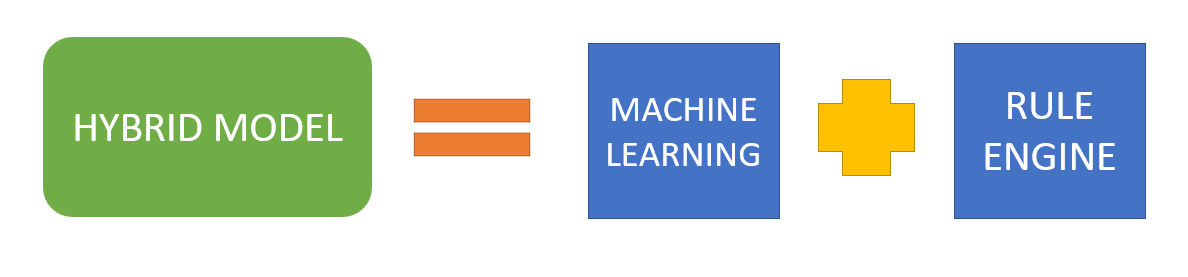

In [36]:
from IPython.display import Image
Image(filename=r"C:\\Users\\amanr\\OneDrive\\Desktop\\12.png")

In [39]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Import and preprocessing

In [40]:
TeweetData = pd.read_csv(r"C:\\Users\\amanr\\OneDrive\\Desktop\\Tweets.csv")

In [41]:
TeweetData.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
1,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)
3,5.703010e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)
4,5.703010e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,24-02-2015 11:13,San Francisco CA,Pacific Time (US & Canada)


In [42]:
TeweetDataSubset = TeweetData[["text","airline_sentiment"]]

In [43]:
TeweetDataSubset.head()

,text,airline_sentiment
0,@VirginAmerica plus you've added commercials t...,positive
1,@VirginAmerica it's really aggressive to blast...,negative
2,@VirginAmerica and it's a really big bad thing...,negative
3,@VirginAmerica seriously would pay $30 a fligh...,negative
4,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [44]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amanr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
stop_words = set(stopwords.words("english"))
#print(stop_words)

In [46]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [47]:
wordnet = WordNetLemmatizer()
def text_preproc(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

In [48]:
TeweetDataSubset.head(10)

,text,airline_sentiment
0,@VirginAmerica plus you've added commercials t...,positive
1,@VirginAmerica it's really aggressive to blast...,negative
2,@VirginAmerica and it's a really big bad thing...,negative
3,@VirginAmerica seriously would pay $30 a fligh...,negative
4,"@VirginAmerica yes, nearly every time I fly VX...",positive
5,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
6,"@VirginAmerica it was amazing, and arrived an ...",positive
7,@VirginAmerica I &lt;3 pretty graphics. so muc...,positive
8,@VirginAmerica This is such a great deal! Alre...,positive
9,@VirginAmerica @virginmedia I'm flying your #f...,positive


In [49]:
TeweetDataSubset['clean_text'] = TeweetDataSubset.text.apply(text_preproc)

In [50]:
TeweetDataSubset.head()

,text,airline_sentiment,clean_text
0,@VirginAmerica plus you've added commercials t...,positive,plus added commercials experience tacky
1,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainme...
2,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing
3,@VirginAmerica seriously would pay $30 a fligh...,negative,seriously would pay flight seats playing it r...
4,"@VirginAmerica yes, nearly every time I fly VX...",positive,yes nearly every time fly vx ear worm wont go...


# Basic ML model

In [51]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(TeweetDataSubset["clean_text"],TeweetDataSubset["airline_sentiment"],test_size=0.1,shuffle=True)

In [52]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True,max_features=10)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [53]:
lr_tfidf=MultinomialNB()
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))


              precision    recall  f1-score   support

    negative       0.83      0.98      0.90       932
    positive       0.69      0.16      0.26       223

    accuracy                           0.82      1155
   macro avg       0.76      0.57      0.58      1155
weighted avg       0.80      0.82      0.78      1155

Confusion Matrix: [[916  16]
 [188  35]]


# HYBRID model

In [54]:
#Adding regular expression to data
import re
from collections import Counter
Counter(" ".join(TeweetDataSubset['clean_text']).split()).most_common(100)

[('flight', 3315),
 ('i', 1104),
 ('get', 1102),
 ('cancelled', 956),
 ('thanks', 920),
 ('service', 909),
 ('customer', 724),
 ('time', 695),
 ('help', 686),
 ('hours', 656),
 ('hold', 621),
 ('plane', 584),
 ('amp', 582),
 ('us', 567),
 ('thank', 535),
 ('still', 529),
 ('delayed', 517),
 ('can', 502),
 ('one', 492),
 ('flights', 478),
 ('call', 477),
 ('gate', 476),
 ('hour', 467),
 ('flightled', 460),
 ('you', 456),
 ('bag', 448),
 ('back', 448),
 ('would', 438),
 ('got', 399),
 ('late', 395),
 ('phone', 392),
 ('need', 391),
 ('please', 386),
 ('airline', 374),
 ('like', 353),
 ('today', 351),
 ('waiting', 351),
 ('guys', 334),
 ('great', 317),
 ('that', 316),
 ('wait', 307),
 ('u', 306),
 ('never', 304),
 ('fly', 303),
 ('me', 303),
 ('day', 303),
 ('trying', 302),
 ('it', 291),
 ('delay', 288),
 ('really', 283),
 ('airport', 283),
 ('minutes', 278),
 ('even', 274),
 ('going', 271),
 ('people', 268),
 ('last', 262),
 ('way', 262),
 ('bags', 259),
 ('weather', 257),
 ('good', 254)

In [56]:
Postive_pattern_1 = r"thanks"
Postive_pattern_2 = r"thank"
Postive_pattern_3 = r"great"
Postive_pattern_4 = r"good"
Postive_pattern_5 = r"safe"
Postive_pattern_6 = r"awesome"
Postive_pattern_7 = r"new"
Postive_pattern_8 = r"satisfied"

Positive_Pattern_List = [Postive_pattern_1,Postive_pattern_2,Postive_pattern_3,Postive_pattern_4,
                        Postive_pattern_5,Postive_pattern_6,Postive_pattern_7,Postive_pattern_8]

In [57]:
Positive_Complex_Pattern = re.compile('|'.join(['(%s)' % i for i in Positive_Pattern_List]),re.IGNORECASE)

In [58]:
Negative_pattern_1 = r"cancelled"
Negative_pattern_2 = r"delayed"
Negative_pattern_3 = r"trying"
Negative_pattern_4 = r"please"
Negative_pattern_5 = r"wait"
Negative_pattern_6 = r"worst"
Negative_pattern_7 = r"lost"
Negative_pattern_8 = r"never"
Negative_pattern_9 = r"fraud trans"

Negative_Pattern_List = [Negative_pattern_1,Negative_pattern_2,Negative_pattern_3,Negative_pattern_4,
                        Negative_pattern_5,Negative_pattern_6,Negative_pattern_7,Negative_pattern_8]

In [59]:
Negative_Complex_Pattern = re.compile('|'.join(['(%s)' % i for i in Negative_Pattern_List]),re.IGNORECASE)

In [60]:
TeweetDataSubset["Negative_Sentiment_Flag"] = TeweetDataSubset["clean_text"].apply(lambda x:1 if(len(re.findall(Negative_Complex_Pattern,x))>0) else 0)

In [61]:
TeweetDataSubset["Positive_Sentiment_Flag"] = TeweetDataSubset["clean_text"].apply(lambda x:1 if(len(re.findall(Positive_Complex_Pattern,x))>0) else 0)

In [62]:
TeweetDataSubset.head(20)

,text,airline_sentiment,clean_text,Negative_Sentiment_Flag,Positive_Sentiment_Flag
0,@VirginAmerica plus you've added commercials t...,positive,plus added commercials experience tacky,0,0
1,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainme...,0,0
2,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing,0,0
3,@VirginAmerica seriously would pay $30 a fligh...,negative,seriously would pay flight seats playing it r...,0,0
4,"@VirginAmerica yes, nearly every time I fly VX...",positive,yes nearly every time fly vx ear worm wont go...,0,0
5,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive,well didn do d,0,0
6,"@VirginAmerica it was amazing, and arrived an ...",positive,amazing arrived hour early good me,0,1
7,@VirginAmerica I &lt;3 pretty graphics. so muc...,positive,lt pretty graphics much better minimal iconog...,0,0
8,@VirginAmerica This is such a great deal! Alre...,positive,great deal already thinking trip amp even gon...,0,1
9,@VirginAmerica @virginmedia I'm flying your #f...,positive,i flying skies again u take away travel,0,0


In [63]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(TeweetDataSubset[["clean_text","Negative_Sentiment_Flag","Positive_Sentiment_Flag"]],TeweetDataSubset["airline_sentiment"],test_size=0.1,shuffle=True)

In [64]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True,max_features = 10)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train["clean_text"]) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test["clean_text"])

In [65]:
mydf = pd.DataFrame(X_train_vectors_tfidf.toarray())
mydf_test = pd.DataFrame(X_test_vectors_tfidf.toarray())

In [66]:
flag_columns_train = X_train[["Negative_Sentiment_Flag","Positive_Sentiment_Flag"]]
flag_columns_test = X_test[["Negative_Sentiment_Flag","Positive_Sentiment_Flag"]]

In [67]:
X_train_vectors_tfidf_combined_with_flag = pd.concat([mydf.reset_index(drop=True),flag_columns_train.reset_index(drop=True)],axis=1)

In [69]:
X_test_vectors_tfidf_combined_with_flag = pd.concat([mydf_test.reset_index(drop=True),flag_columns_test.reset_index(drop=True)],axis=1)

In [70]:
lr_tfidf=MultinomialNB()
lr_tfidf.fit(X_train_vectors_tfidf_combined_with_flag, y_train)  

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf_combined_with_flag)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf_combined_with_flag)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

    negative       0.87      0.95      0.91       915
    positive       0.73      0.48      0.58       240

    accuracy                           0.85      1155
   macro avg       0.80      0.72      0.75      1155
weighted avg       0.84      0.85      0.84      1155

Confusion Matrix: [[872  43]
 [125 115]]
